<center>

![Logo](https://www.pngkit.com/png/full/873-8736788_technology-background-white-png-ferris-wheel.png)

<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

#   ANALYSOINNIN PERUSTEET
    Working with Data (Analysis & Visualization)

</span>

<span style="color:#6acaff;">

### TAKE THE L
    MATIAS; LAURA; JANI; TEEMU; EETU

</span>

</span>

![Python-logo](https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg)
![Jupyter-logo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/120px-Jupyter_logo.svg.png)                                      

---

<center>

<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

# INTRO

</span>

<span style="color:#ffefdf;">

##### ALKUPUHE, ESITYKSEN SISÄLTÖ SEKÄ VAIHEET

</span>

---

<center>

<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

## 1 - Moduulien & Datan tuonti, Tulostus

</span>


<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

#### 1.1 Moduulit

<span style="color:#ffff80;">Käytämme import-lauseketta tuodaksemme erilaisia moduuleja, joita tarvitsemme data-analytiikassa:</span>

</span>

<span style="color:#ffefdf;">

    HUOM | sen sijaan, että käyttäisimme moduulin koko nimeä, annamme sille alkuperäistä lyhyemmän viitenimen!
    
- <span style="color:#80ff80;">~~Pandas~~</span> -moduuli, jolle annetaan viitenimi <span style="color:#80ff80;">pd.</span>

- <span style="color:#ffd400;">~~NumPy~~</span> -moduuli, jolle annetaan viitenimi <span style="color:#ffd400;">np.</span>

- <span style="color:#e69138;">~~Matplotlib~~</span> -moduuli, jolle annetaan viitenimi <span style="color:#e69138;">plt.</span>

<br>

<span style="color:#ff8040;">

#### 1.2 Data:

</span>

<span style="color:#ffefdf;">

- Otamme <span style="color:#1ED760;">CSV</span> -muotoisen tiedoston nimeltään <span style="color:#1ED760;">spotify_songs.csv</span> haltuun, tuomalla se projektiin.

- Kun data on tuotu, se otetaan seuraavaksi käyttöön. Data varastoidaan muuttujaan nimeltä <span style="color:#6acaff;">spotify.</span>

    <span style="color:#ffff80;">CSV -tiedoston sijainti:
    
    - <span style="color:#80ff80;">Oletuksena, tiedosto haetaan samasta kansiosta kuin itse kooditiedosto.</span>
    
    - <span style="color:#ff4040;">Jos datatiedosto on eri kansiossa kuin kooditiedosto, datatiedoston polku täytyy erikseen määrittää!</span>

</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">1 - Moduulien & Datan tuonti, Tulostus</div>

</span>

In [22]:
# 1.1 Moduulit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.2 Data

# .read_csv() -funktio lukee CSV -muotoisen tiedoston, ja muuntaa sen DataFrameksi:
spotify = pd.read_csv('spotify_songs.csv')

<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

#### 1.3 Tulostus

</span>

<span style="color:#ffefdf;">

<span style="color:#ffff80;">Seuraavaksi tulostamme DataFramen - saamme varmistuksen koodin, moduulien sekä tiedostojen toimivuudesta:</span>

- DataFrame <span style="color:#80ff80;">(Pandas)</span> näyttäytyy taulukkona sen sijaan, että työskentelisimme terminaalissa. Tämä mahdollistaa kätevän ja selkeän tavan seurata datan kehittymistä visuaalisesti.

</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">1 - Moduulien & Datan tuonti, Tulostus</div>

</span>

</span>

In [23]:
# 1.3 Tulostus

# .head() -funktio tulostaa DataFramen, oletuksena ensimmäiset 5 riviä:
spotify.head()

# Lisäämällä parametrin, voimme määrittää tarkan rivimäärän:
spotify.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.07240,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.08030,0.000000,0.0833,0.725,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,09IStsImFySgyp0pIQdqAc,The Middle,Zedd,84,7nEiwcUSwycvC77kZ9ub7c,The Middle,2018-01-23,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,7,-3.061,1,0.0449,0.17100,0.000000,0.1120,0.437,107.010,184732
96,1lGVyEkGHUz7Pg78QGaS4a,Wanted,NOTD,70,5sPC6RYCERdNCzHLRf9zHb,Wanted,2019-09-27,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,5,-4.449,1,0.0723,0.18500,0.000000,0.0639,0.378,95.972,160998
97,6ksMjdec8b6C45TUawkAdu,Crash Into Me,Steve Aoki,37,2dRuXHSYXjRubjTkjMFZFD,Crash Into Me,2019-07-12,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,1,-6.476,0,0.0981,0.00246,0.000000,0.5770,0.341,115.033,226093
98,1vsQb8n0icvMsFnL9663LM,Need Your Love (with Noah Kahan),Gryffin,70,5CaTHgZaRvb2vCK1mVbCR1,Gravity,2019-10-24,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,0,-3.962,1,0.0406,0.16000,0.000000,0.1830,0.523,104.099,205787


<span style="font-family: 'Roboto', sans-serif">

<span style="color:#80ff80;">

Voimme todeta koodin toimivan, sillä saimme DataFramen näkyville - helppoa ja kivaa.

</span>

<span style="color:#ffefdf;">

- Tulemme tulostamaan DataFramen jokaisen vaiheen jälkeen, jotta voimme seurata datakäsittelyn vaikutusta sekä vaiheita.

      HUOM | Koodauksen tapaan on tärkeää testata koodin toimivuutta etenemisen aikana.

</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">1 - Moduulien & Datan tuonti, Tulostus</div>

</span>

---


<center>

![Logo](https://www.pngkit.com/png/full/873-8736788_technology-background-white-png-ferris-wheel.png)

<span style="color:#ff8040;">

## 2 - Datan esikäsittely & puhdistus:

</span>


<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

#### 2.1 Datan esikäsittely

</span>

    Datan esikäsittely on olennainen osa data-analyysiä, se tapahtuu CSV -tiedostossa.

<span style="color:#1ED760;">CSV</span> <span style="color:#ffff80;">-tiedosto voi sisältää raakaa dataa, mutta voi olla myös esikäsiteltyä:</span>

- <span style="color:#ffefdf;">Raaka data: Joskus CSV-tiedosto voi olla suoraan peräisin alkuperäislähteestä ilman suuria muokkauksia. Tätä kutsutaan raaksi dataksi, ja se voi olla esimerkiksi alkuperäislähteen antamaa raakaa tietoa, joka tarvitsee vielä käsittelyä ja puhdistusta.</span>

- <span style="color:#ffefdf;">Esikäsitelty data: Toisaalta CSV-tiedosto saattaa olla myös jo käsitelty ja muokattu ennen tallentamista. Tämä voi sisältää toimenpiteitä kuten puuttuvien arvojen käsittelyä, tyyppimuunnoksia, poikkeavien arvojen käsittelyä tai muita datan puhdistusvaiheita.</span>

_<span style="color:#ff8040;">Huolimatta siitä onko data käsiteltyä, jos siinä on rakenne joka mahdollistaa sen jatkokäsittelyn - se riittää:</span>_

<span style="color:#80ff80;">Se mahdollistaa kyseisen datatiedoston jakamisen erilaisten taulukkolaskentaohjelmien, tietokantojen tai ohjelmointikielien välillä datan analysointiin tai käsittelyyn.</span>

<br>

<span style="color:#ff8040;">Tarkastelemalla alla olevaa DataFramea, voimme tehdä muutamia havaintoja:</span>
    
- <span style="color:#ffff80;">Sarakkeiden nimet:</span> <span style="color:#ffefdf;">Sarakkeiden nimissä esiintyy merkkejä, ja joitain sarakkeita saattaa esiintyä kahdesti. Lisäksi havaitsemme, että sarakkeita on tarpeettoman paljon, mikä voi vaikuttaa datan käsittelyyn ja analysointiin.</span>

- <span style="color:#ffff80;">Epämääräinen järjestys:</span> <span style="color:#ffefdf;">Data näyttää olevan epämääräisessä järjestyksessä ilman selkeää säännönmukaisuutta. Järjestäminen voisi tehdä datan tarkastelusta ja analysoinnista helpompaa.</span>

- <span style="color:#ffff80;">Numerot ja murtoluvut:</span> <span style="color:#ffefdf;">Datan joukossa on sekä murtolukuja että numeroita, ja jotkin numerot voisivat ehkä esittää tietoa paremmin sanallisesti ilmaistuna.</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [24]:
# .head() -komento tulostaa oletuksena taulukon ensimmäiset 5 riviä:
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


<span style="font-family: 'Roboto', sans-serif">

<span style="color:#ff8040;">

#### 2.2 Datan puhdistus

</span>

<span style="color:#ff8040;"> Voimme siirtyä seuraavaan toimenpiteeseen - puhdistus.</span>

    Havaitsimme epäselkeyttä taulukosta, mistä aloitamme?

_<span style="color:#ffff80;">Riippuu täysin käyttäjästä, se mikä vaivaa päätä eniten.</span> <span style="color:#80ff80;"> Luonnollinen vaihtoehto voisi olla aloittaminen suurista kokonaisuuksista, ja siirtyä loppua myöten pienempiin yksityiskohtiin.</span>_

<br>

##### _<span style="color:#ff8040;">2.2.1 Kolumnin poisto</span>_

<span style="color:#ffff80;">Kolumnin poistaminen tarkoittaa tietyn sarakkeen tai ominaisuuden poistamista tietokokonaisuudesta.</span>
    
- <span style="color:#ffefdf;">Havainnoidessa DataFramea, huomio kiinnittyy sen monipuoliseen kolumnivalikoimaan.</span>

- <span style="color:#ffefdf;"> Vaikka nämä kolumnit voivat olla merkittäviä esimerkiksi Spotifyn omalle algoritmille, ne eivät ole välttämättä olennaisia omassa käytössämme -</span> <span style="color:#ff8040;">voimme todeta niiden olevan epäolennaisia, ja poistaa ne näkyvistä.</span>

      HUOM | Kun poistamme kolumnin, se ainoastaan "katoaa" näkyvistä DataFramessa. Alkuperäisen CSV-tiedoston tiedot säilyvät ennallaan eivätkä muutu millään tavalla. Koodi toimii ikään kuin filtterinä, valiten ne osat datasta, jotka haluamme näyttää DataFrameissamme, ja samalla jättäen pois ne, joita emme halua näyttää.

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [25]:
# .drop() -funktio poistaa taulukosta halutut sarakkeet:
spotify = spotify.drop(['track_id',
                        'track_album_id',
                        'playlist_name',
                        'playlist_id',
                        'duration_ms',
                        'loudness',
                        'mode',
                        'energy',
                        'danceability',
                        'key',
                        'speechiness',
                        'acousticness',
                        'instrumentalness',
                        'liveness',
                        'valence','playlist_subgenre'],
                        # Axis -parametri:
                        axis = 1)

                        # "axis" parametrillä eritellään vaaka- & pystyrivit toisistaan:
                        #   - axis = 0 valitsee vaakarivin (yksittäinen rivi)
                        #   - axis = 1 valitsee pystyrivin (kokonainen sarake)
                        

In [26]:
spotify.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122.036
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,pop,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,pop,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,pop,123.976


<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.2 Kolumnin nimen vaihto</span>_

<span style="color:#ffff80;">Kolumnin nimen vaihtaminen DataFramessa on hyödyllinen toimenpide, kun halutaan tehdä dataa ymmärrettävämmäksi tai jos kolumnin nimi ei vastaa sen sisältöä.</span>
    
- <span style="color:#ffefdf;">Havainnoidessa DataFramea, huomio kiinnittyy sen monipuoliseen kolumnivalikoimaan.</span>

- <span style="color:#ffefdf;"> Vaikka nämä kolumnit voivat olla merkittäviä esimerkiksi Spotifyn omalle algoritmille, ne eivät ole välttämättä olennaisia omassa käytössämme -</span> <span style="color:#ff8040;">voimme todeta niiden olevan epäolennaisia, ja poistaa ne näkyvistä.</span>

      HUOM | Kun poistamme kolumnin, se ainoastaan "katoaa" näkyvistä DataFramessa. Alkuperäisen CSV-tiedoston tiedot säilyvät ennallaan eivätkä muutu millään tavalla. Koodi toimii ikään kuin filtterinä, valiten ne osat datasta, jotka haluamme näyttää DataFrameissamme, ja samalla jättäen pois ne, joita emme halua näyttää.

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [27]:
# .rename() -funktio valitsee halutut kolumnit:
spotify = spotify.rename(columns = {'track_name' : 'Track Name',
                                    'track_artist' : 'Artist',
                                    'track_popularity' : 'Popularity',
                                    'track_album_name' : 'Album Name',
                                    'track_album_release_date' : 'Release Date',
                                    'playlist_genre' : 'Genre',
                                    'tempo' : 'Tempo (BPM)'
                                    })

In [ ]:
spotify.head()

<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.3 Murtoluvusta kokonaisluvuksi</span>_

<span style="color:#ffff80;">Murtoluvun muuntaminen kokonaisluvuksi on yleinen toimenpide datan käsittelyssä ja analyysissä.</span>
    
- <span style="color:#ffefdf;">Numeroiden käsittelyssä voi olla tilanteita, joissa meidän on pyöristettävä alaspäin tai katkaistava desimaaliluvut, jotta saamme kokonaislukuja.</span>

- <span style="color:#ffefdf;">Esimerkiksi taloudellisissa laskelmissa saatamme olla kiinnostuneita valuuttayksiköiden kokonaisluvuista, ja desimaalin pyöristäminen alaspäin on tärkeää tarkan tuloksen saavuttamiseksi.</span>

      HUOM | Muuntaminen murtoluvusta kokonaisluvuksi tarkoittaa desimaaliosan poistamista ja vain kokonaisluvun säilyttämistä. Tämä prosessi voi vaikuttaa datan tarkkuuteen, ja on tärkeää harkita seurauksia tapauskohtaisesti.

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [28]:
# .astype() -funktio muuntaa data-tyypin toiseen:
spotify['Tempo (BPM)'] = spotify['Tempo (BPM)'].astype(int)

In [29]:
spotify.head()

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,pop,123


<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.4 Arvojärjestys</span>_

<span style="color:#ffff80;">Tämä toimenpide on hyödyllinen, kun halutaan tarkastella dataa järjestyksessä tai suorittaa vertailuita.</span>

<span style="color:#ff8040;">DataFramen luettavuus helpottuu, kun järjestys voidaan määrittää kolumnien mukaan.</span>

    HUOM | Voit valita nousevaan tai laskevaan järjestykseen. Voit myös määrittää tietyn sarakkeen, jonka perusteella järjestely suoritetaan, tarjoten joustavuutta ja tarkan kontrollin datan järjestelyssä.

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [30]:
# .sort_values() -funktio järjestää Spotify-taulukon rivit "Popularity"-sarakkeen mukaan, laskevassa järjestyksessä:
spotify.sort_values("Popularity", ascending=False)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,latin,98
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,pop,98
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,edm,116
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
21468,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
...,...,...,...,...,...,...,...
15604,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,Hot Rocks 1964-1971,1971-12-20,rock,135
4977,Stone,JOY.,0,Stone,2014-10-28,pop,124
4975,Walk Away,LANY,0,Hot Lights,2014-04-22,pop,85
11326,The Back Seat Of My Car,Paul McCartney,0,Wingspan (UK Version),2001-05-07,rock,163


<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.5 Kokonaisluvusta sanaksi</span>_

<span style="color:#ffff80;">Kokonaisluvusta sanaksi muuntaminen on yleinen tehtävä datan käsittelyssä, kun halutaan tehdä dataa ihmisen luettavammaksi tai esittää se raporteissa tai visualisoinneissa selkeästi.</span>
    
- <span style="color:#ffefdf;">Joskus dataa kuvaillaan numeroin, vaikka ne olisi helpompi sisäistää muussa muodossa.</span>

      HUOM | Esikäsittelyssä voisi olla mahdollista jo tehdä alustava päätös siitä, missä muodossa data tallennetaan.

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [31]:
# def = funktio | categorize_popularity = funktion nimi:
def categorize_popularity(Popularity):
    if Popularity >= 0 and Popularity < 25:
        return 'low'
    elif Popularity >=25 and Popularity<50:
        return 'medium'
    elif Popularity >=50 and Popularity<75:
        return 'high'
    elif Popularity >= 75:
        return 'extremely-high'
# Voimme käyttää .apply() -metodia luodaksemme uuden sarakkeen 'Popularity' perustuen 'Popularity' -sarakkeeseen.
spotify['Popularity'] = spotify['Popularity'].apply(categorize_popularity)
    

In [32]:
spotify.head()

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123


<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.6 Puuttuvien arvojen poistaminen</span>_

<span style="color:#ffff80;">Puuttuvat arvot voivat aiheuttaa haasteita datan analysoinnissa, mahdollisesti myös virheilmoituksia.</span>
    
- <span style="color:#ffefdf;">Voidaan tehdä päätös, onko kannattava vaihtoehto luopua datasta joka saattaa olla korruptoitunut, puutteellinen tai muuten vaan virheellinen.</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [33]:
# .dropna() -funktio poistaa ne rivit, joissa tiettyjen sarakkeiden arvot puuttuvat...
# lopuksi, se tulostaa jäljelle jääneiden puuttuvien arvojen määrän kullekin sarakkeelle:
spotify.dropna(subset=['Track Name', 'Artist','Album Name'], inplace=True)
missing_count = spotify.isnull().sum()
print(missing_count)



Track Name      0
Artist          0
Popularity      0
Album Name      0
Release Date    0
Genre           0
Tempo (BPM)     0
dtype: int64


In [ ]:
spotify.head()

<span style="font-family: 'Roboto', sans-serif">

<br>

##### _<span style="color:#ff8040;">2.2.7 Kaksoiskappaleiden poistaminen</span>_

<span style="color:#ffff80;">Kaksoiskappaleet voivat aiheuttavaa vaivaa datassa ja vaikuttaa lopullisen analyysiin tarkkuuteen.</span>
    
- <span style="color:#ffefdf;">Joskus kaksoiskappaleita voidaa tietoisesti kaivata, riippuen taas millaista dataa on kyseessä.</span>

- <span style="color:#ffefdf;">Joissain tapauksissa kuitenkin, se halutaan ehkäistä:</span>

<br>

<span style="color:#ff8040;">

<div style="text-align: right">2 - Datan esikäsittely & puhdistus</div>

</span>

In [34]:
#.drop_duplicates - komento poistaa rivit, joilla on samat arvot "Track Name" -sarakkeessa. 
spotify.drop_duplicates(subset=['Track Name'])

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,medium,City Of Lights (Vocal Mix),2014-04-28,edm,128
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,low,Closer Remixed,2013-03-08,edm,128
32830,Sweet Surrender - Radio Edit,Starkillers,low,Sweet Surrender (Radio Edit),2014-04-21,edm,127
32831,Only For You - Maor Levi Remix,Mat Zo,low,Only For You (Remixes),2014-01-01,edm,128


Seuraavaksi tutkimme kolumnien attribuutti-tyyppejä, käyttämällä for-looppia.

In [35]:
for column in spotify.columns:
    unique_values = spotify[column].unique()
    num_unique = len(unique_values)
    data_type = spotify[column].dtype

    print(f"Sarake: {column}")
    print(f"Uniikit arvot: {unique_values}")
    print(f"Uniikkien arvojen määrä: {num_unique}")
    print(f"Sarakkeen tyyppi: {data_type}")
    

    # Tunnistetaan attribuuttityypit
    
    if num_unique == 2:
        print(f"{column} on binaarinen attribuutti")
        print()
    elif num_unique > 2 and data_type == 'object':
        print(f"{column} on nimellinen attribuutti")
        print()
    elif num_unique > 2 and (data_type == 'int64' or data_type == 'float64'):
        print(f"{column} on järjestyslukuinen attribuutti")
        print()


Sarake: Track Name
Uniikit arvot: ["I Don't Care (with Justin Bieber) - Loud Luxury Remix"
 'Memories - Dillon Francis Remix' 'All the Time - Don Diablo Remix' ...
 'Sweet Surrender - Radio Edit' 'Only For You - Maor Levi Remix'
 'Typhoon - Original Mix']
Uniikkien arvojen määrä: 23449
Sarakkeen tyyppi: object
Track Name on nimellinen attribuutti

Sarake: Artist
Uniikit arvot: ['Ed Sheeran' 'Maroon 5' 'Zara Larsson' ...
 'Ferry Corsten feat. Jenny Wahlstrom' 'Tegan and Sara' 'Mat Zo']
Uniikkien arvojen määrä: 10692
Sarakkeen tyyppi: object
Artist on nimellinen attribuutti

Sarake: Popularity
Uniikit arvot: ['high' 'medium' 'low' 'extremely-high']
Uniikkien arvojen määrä: 4
Sarakkeen tyyppi: object
Popularity on nimellinen attribuutti

Sarake: Album Name
Uniikit arvot: ["I Don't Care (with Justin Bieber) [Loud Luxury Remix]"
 'Memories (Dillon Francis Remix)' 'All the Time (Don Diablo Remix)' ...
 'Sweet Surrender (Radio Edit)' 'Only For You (Remixes)' 'Typhoon/Storm']
Uniikkien arvojen

Sitten katsomme minimi- ja maksimiarvoja, ja tähän käytimme osiota 'Tempo' sillä se on ainoa järjestyslukuinen attribuutti 

In [36]:
tempo_min = np.min(spotify['Tempo (BPM)'])
tempo_max = np.max(spotify['Tempo (BPM)'])

print(f"Minimi tempo: {tempo_min}")
print(f"Maksimi tempo: {tempo_max}")

Minimi tempo: 0
Maksimi tempo: 239


Tässä laskimme keskiarvoja, mediaaneja, ja keskihajontaa. Myös summaa ja tuloa kokeilimme, mutta tässä tapauksessa se ei ole kovin hyödyllistä tietoa analysoinnin kannalta. Käytimme jälleenkerran attribuuttia 'Tempo'

In [37]:
tempo_mean = np.mean(spotify['Tempo (BPM)'])
tempo_median = np.median(spotify['Tempo (BPM)'])

print(f"Keskiarvo (Mean) Tempo (BPM): {tempo_mean}")
print(f"Mediaani (Median) Tempo (BPM): {tempo_median}")

# Keskihajonta ja varianssi
tempo_std = np.std(spotify['Tempo (BPM)'])
tempo_var = np.var(spotify['Tempo (BPM)'])

print(f"Keskihajonta (Standard Deviation) Tempo (BPM): {tempo_std}")
print(f"Varianssi (Variance) Tempo (BPM): {tempo_var}")

# Summa ja tulo
tempo_sum = np.sum(spotify['Tempo (BPM)'])
tempo_product = np.prod(spotify['Tempo (BPM)'])

print(f"Summa (Sum) Tempo (BPM): {tempo_sum}")
print(f"Tulo (Product) Tempo (BPM): {tempo_product}")

Keskiarvo (Mean) Tempo (BPM): 120.4069696600463
Mediaani (Median) Tempo (BPM): 121.0
Keskihajonta (Standard Deviation) Tempo (BPM): 26.905683982226
Varianssi (Variance) Tempo (BPM): 723.9158305514129
Summa (Sum) Tempo (BPM): 3952720
Tulo (Product) Tempo (BPM): 0


Lopuksi tulostimme "Parannellun" ja selkeämmin luettavamman sekä käyttäjäystävällisemmän DataFrame taulukon:

In [38]:
spotify.head()

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123


Sitten oli vuorossa visualisointi matplotlibiä käyttäen.

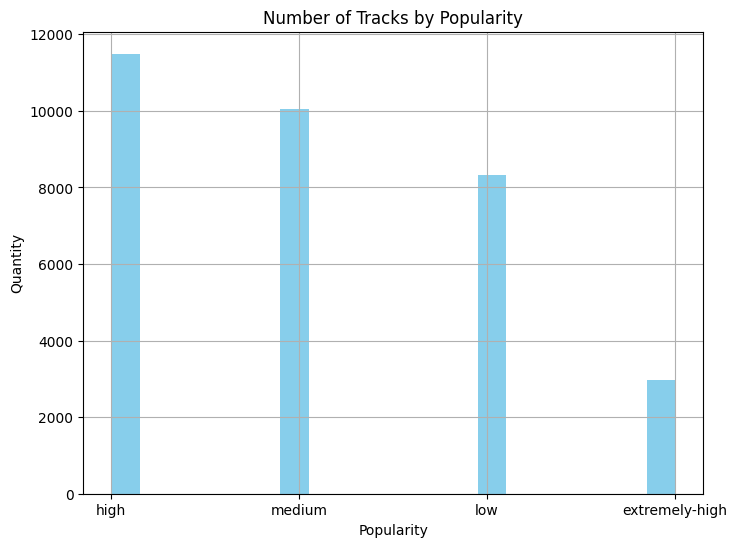

In [39]:
plt.figure(figsize=(8, 6))
plt.hist(spotify['Popularity'], bins=20, color='skyblue')
plt.title('Number of Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()
#nämä luo pylväskaavion kappaleiden suosiosta, mikä hahmottaa kuinka moni kappale kuuluu eri suosioluokkiin.

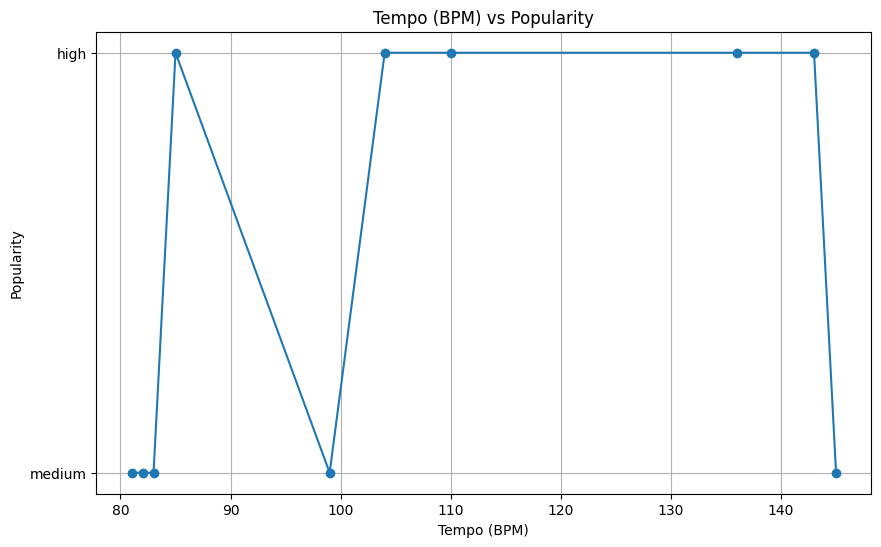

In [40]:
spotify_subset = spotify.sample(10)  # Valitaan 20 eri kappaletta kaavioon
spotify_subset = spotify_subset.sort_values(by='Tempo (BPM)', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(spotify_subset['Tempo (BPM)'], spotify_subset['Popularity'], marker='o')
plt.title('Tempo (BPM) vs Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()
#koodi visualisoi satunnaisesti valitun 10 kappaleen tempojen ja suosion välistä suhdetta viivakaaviolla.

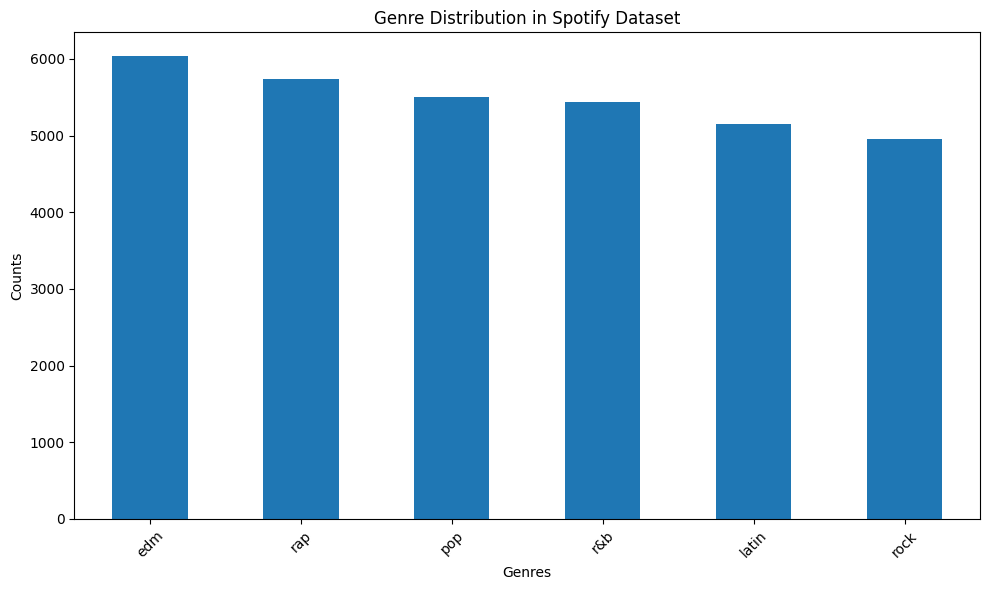

In [41]:
# Oletetaan vaikka sarakkeen 'Genre' datan pohjalta
genre_counts = spotify['Genre'].value_counts()

# Luodaan pylväskaavio
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution in Spotify Dataset')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

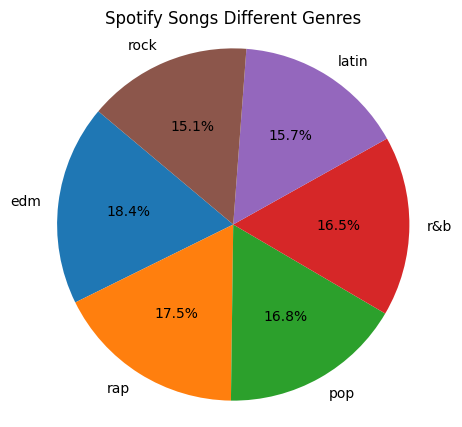

In [42]:
categories = spotify['Genre']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Määrittää ympyrädiagrammin koon
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Spotify Songs Different Genres')

plt.show()
#koodi visualisoi Spotify-kappaleiden eri musiikkigenrejen jakautumista ympyrädiagrammilla.

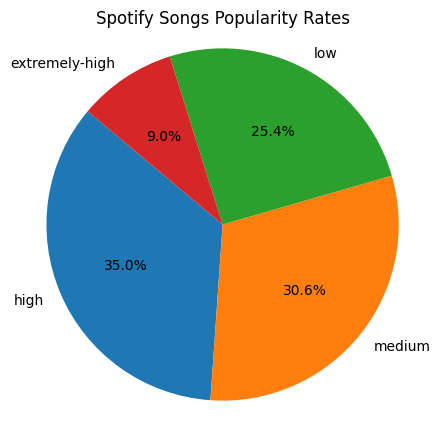

In [43]:
categories = spotify['Popularity']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Määrittää ympyrädiagrammin koon
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Spotify Songs Popularity Rates')

plt.show()

<center>

##### _<span style="color:#ff9020;">- DESIGN BY CVAH_

</span>